<h1>Display the KPI-1b and associated PIs defined by MPC Sentinel-1</h1>
The Key performance Indicators are designed to monitor the WV data quality evolution

<i>Antoine Grouazel - Thomas Lechauve - February 2022</i>

# Define the directory where the .txt files computed with the kpi_mpc lib are stored

In [1]:
output = '/home/developer/notebooks/kpi-1b/output'

units = ['S1A', 'S1B']

wvs = ['wv1', 'wv2']

# Browse and gather the KPI/PI values from .txt files

In [2]:
import glob
import os
import datetime
import numpy as np

outPRUN = {}
cpt_corrupt = 0
for sat in units:
    
    for wv in wvs:
        outPRUN[f'{sat}_{wv}'] = {'kpi':[],'sta':[],'sto':[],'env':[],'nb':[],'bias':[],'std':[]}

        lst_files = sorted(glob.glob(os.path.join(output,f'kpi_output_{sat}_{wv}_20*.txt')))

        print(sat, wv, 'nb files', len(lst_files))
        for ffi, ff in enumerate(lst_files):
            with open(ff) as f:
                content = f.readlines()[0].replace('\n','').split(' ')

            if len(content) == 7:
                kpix,stax,_,stox,_,envx,nbx = content
                meanbias = std = np.nan
            elif len(content) == 9:
                kpix,stax,_,stox,_,envx,nbx,meanbias,std = content
            else:
                cpt_corrupt += 1
                continue

            outPRUN[f'{sat}_{wv}']['kpi'].append(float(kpix))
            outPRUN[f'{sat}_{wv}']['sta'].append(datetime.datetime.strptime(stax,'%Y-%m-%d'))
            outPRUN[f'{sat}_{wv}']['sto'].append(datetime.datetime.strptime(stox,'%Y-%m-%d'))
            outPRUN[f'{sat}_{wv}']['env'].append(float(envx))
            outPRUN[f'{sat}_{wv}']['nb'].append(int(nbx))
            outPRUN[f'{sat}_{wv}']['bias'].append(float(meanbias))
            outPRUN[f'{sat}_{wv}']['std'].append(float(std))

print('done',outPRUN[f'{sat}_{wv}'].keys())
print('cpt_corrupt',cpt_corrupt)

S1A wv1 nb files 416
S1A wv2 nb files 414
S1B wv1 nb files 0
S1B wv2 nb files 0
done dict_keys(['kpi', 'sta', 'sto', 'env', 'nb', 'bias', 'std'])
cpt_corrupt 0


In [3]:
def plot_vectors(outPRUN,typee,ax):
    plt.sca(ax)
    for kk in outPRUN:
        if 'S1' in kk:
            vect_dates = np.array(outPRUN[kk]['sta']) # tested sto
            vect_x = np.array(outPRUN[kk][typee])
            plt.plot(vect_dates,vect_x,'.',label=kk,ms=3)

# Display figures of timeseries for KPI/PIs

2021-01-01 00:00:00 2022-03-01 00:00:00


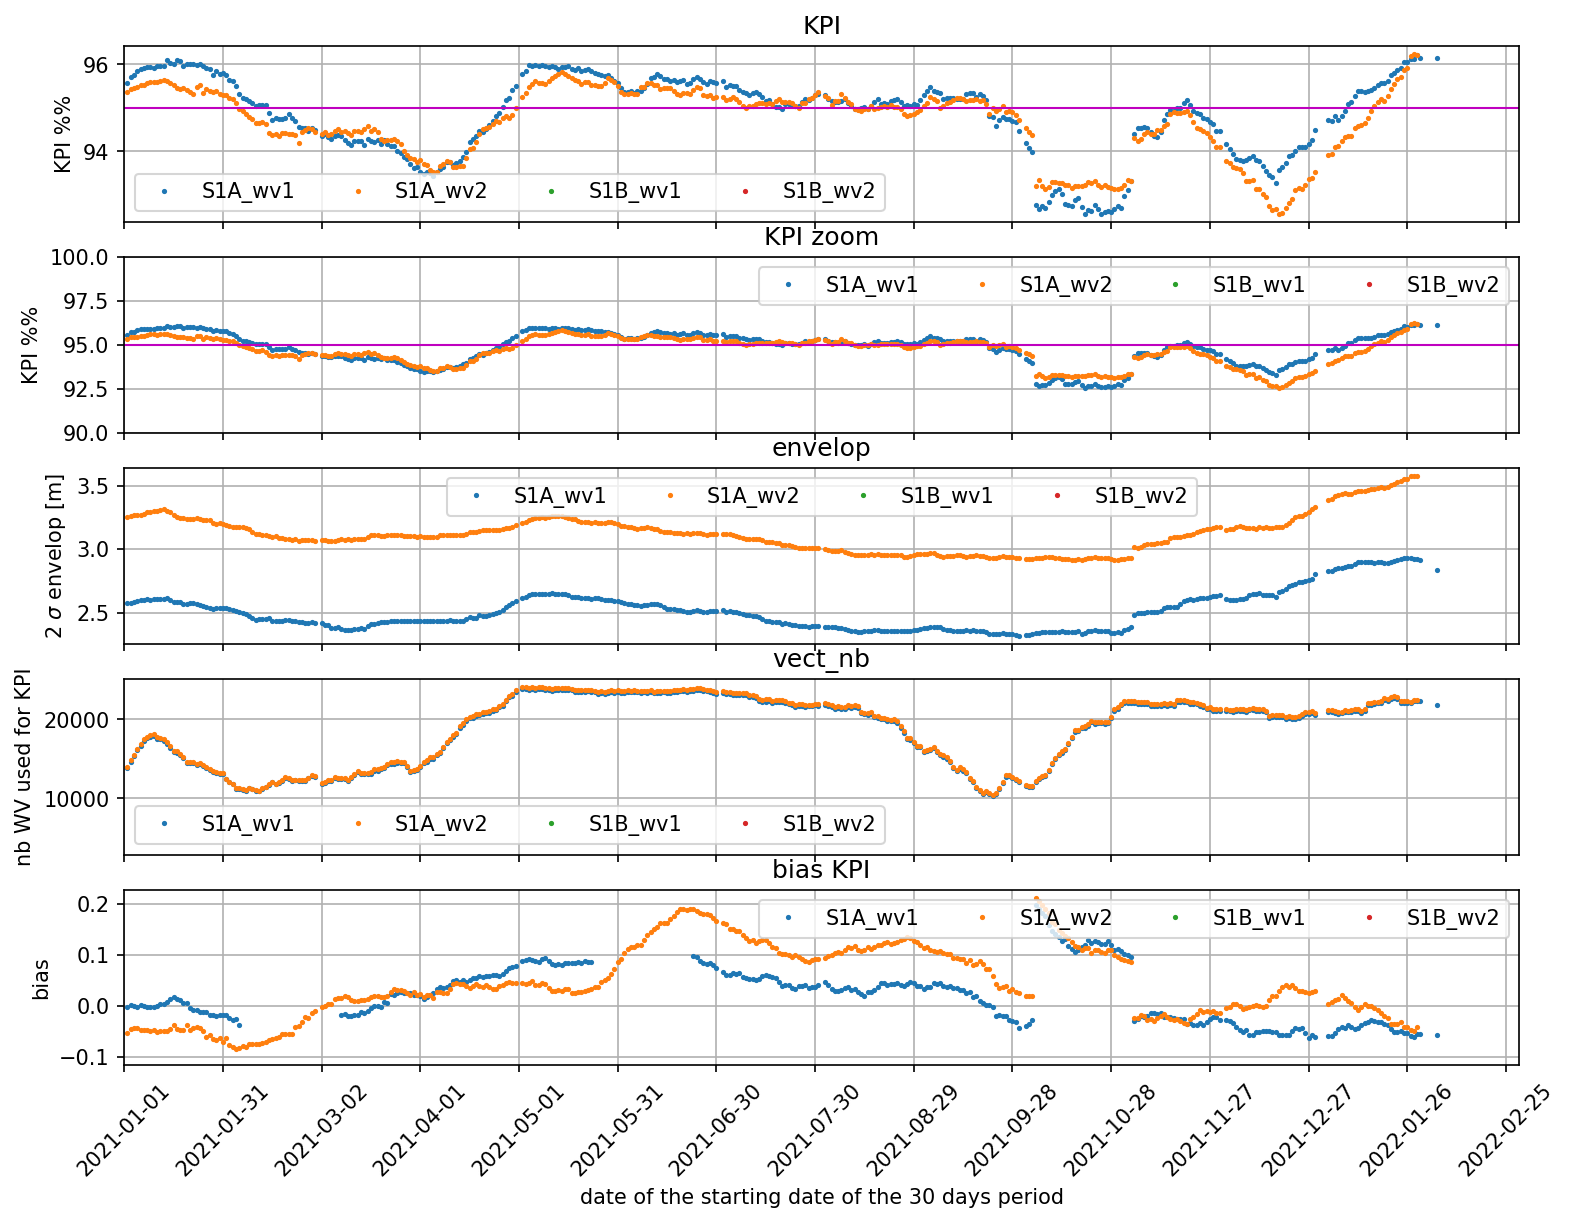

18628.0 19052.0


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
mindate = np.amin(outPRUN['S1A_wv1']['sta'])
maxdate = np.amax(outPRUN['S1A_wv1']['sto'])
mindate = datetime.datetime(2014,4,1)
mindate = datetime.datetime(2021,1,1)
maxdate = datetime.datetime(2022,3,1)
print(mindate,maxdate)
%matplotlib inline
plt.figure(dpi=150,figsize=(12,9))
ax = plt.subplot(5,1,1)
plt.title('KPI')
plot_vectors(outPRUN,'kpi',ax)
plt.legend(ncol=4)
plt.grid(True)
plt.axhline(y=95,lw=1,c='m')
plt.ylabel('KPI %%')
#plt.tick_params(bottom="off", top="on")
plt.xlim(mindate,maxdate)
plt.xticks(rotation=45,visible=False)
start, end = ax.get_xlim()
stepsize = 30
ax.xaxis.set_ticks(np.arange(start, end, stepsize))

ax = plt.subplot(5,1,2)
plt.title('KPI zoom')
plot_vectors(outPRUN,'kpi',ax)
plt.legend(ncol=4)
plt.grid(True)
plt.axhline(y=95,lw=1,c='m')
plt.ylabel('KPI %%')
plt.xticks(rotation=45,visible=False)
plt.xlim(mindate,maxdate)
plt.ylim(90,100)
ax.xaxis.set_ticks(np.arange(start, end, stepsize))

ax = plt.subplot(5,1,3)
plt.title('envelop')
plot_vectors(outPRUN,'env',ax)
plt.legend(ncol=4)
plt.grid(True)
plt.ylabel('2 $\sigma$ envelop [m]')
plt.xlim(mindate,maxdate)
plt.xticks(rotation=45,visible=False)
ax.xaxis.set_ticks(np.arange(start, end, stepsize))

ax = plt.subplot(5,1,4)
plt.title('vect_nb')
plot_vectors(outPRUN,'nb',ax)
plt.legend(ncol=4)
plt.grid(True)
plt.xticks(rotation=45,visible=False)
plt.xlim(mindate,maxdate)
plt.ylabel('nb WV used for KPI')
ax.xaxis.set_ticks(np.arange(start, end, stepsize))


ax = plt.subplot(5,1,5)
plt.title('bias KPI')
plot_vectors(outPRUN,'bias',ax)
plt.legend(ncol=4)
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('bias')
plt.xlim(mindate,maxdate)
plt.xlabel('date of the starting date of the 30 days period')
ax.xaxis.set_ticks(np.arange(start, end, stepsize))
plt.show()


print(start,end)